In [0]:
SVM Experiments - https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://query.data.world/s/mdbcjhigxvf3ytaewaep4qow3acqxo")
df.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [33]:
df.shape

(7352, 563)

In [11]:
pd.Series([col.split('-')[0].split('(')[0] for col in df.columns]).value_counts()

fBodyGyro               79
fBodyAccJerk            79
fBodyAcc                79
tGravityAcc             40
tBodyGyroJerk           40
tBodyAccJerk            40
tBodyGyro               40
tBodyAcc                40
fBodyBodyGyroJerkMag    13
tGravityAccMag          13
tBodyGyroMag            13
fBodyAccMag             13
tBodyAccJerkMag         13
tBodyAccMag             13
fBodyBodyAccJerkMag     13
fBodyBodyGyroMag        13
tBodyGyroJerkMag        13
angle                    7
subject                  1
Activity                 1
dtype: int64

In [18]:
df.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [19]:
df.Activity.value_counts(normalize=True)

LAYING                0.191376
STANDING              0.186888
SITTING               0.174918
WALKING               0.166757
WALKING_UPSTAIRS      0.145947
WALKING_DOWNSTAIRS    0.134113
Name: Activity, dtype: float64

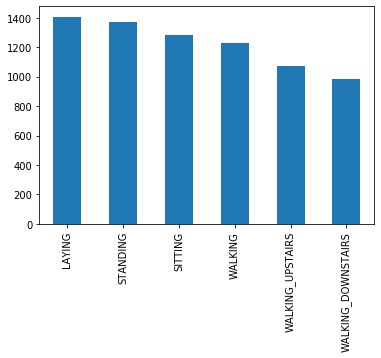

In [20]:
df.Activity.value_counts().plot(kind='bar')

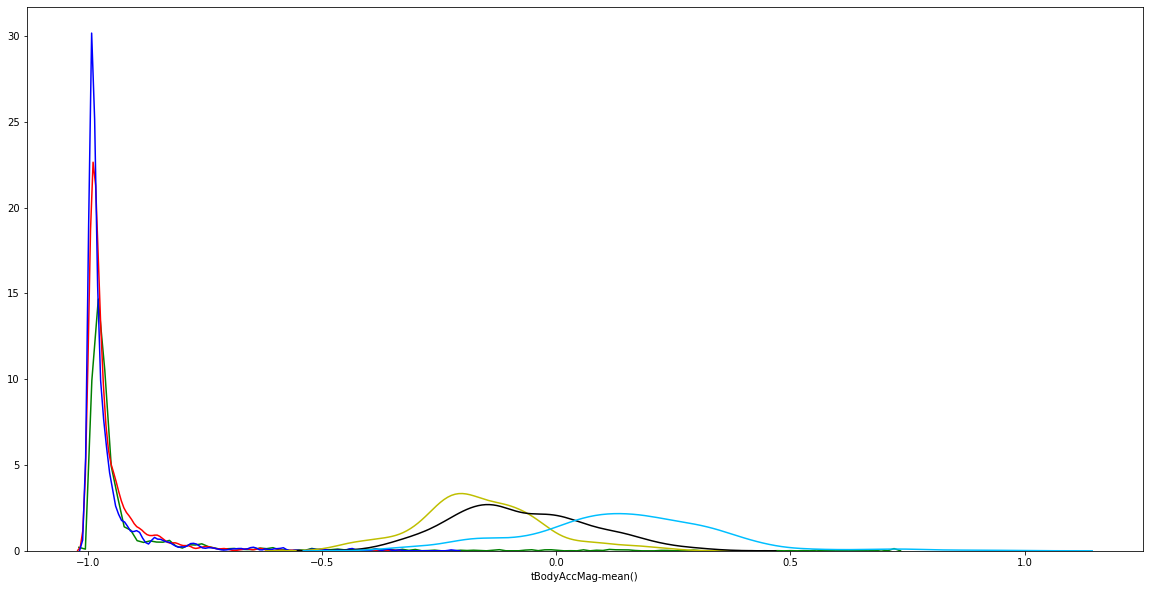

In [25]:
plt.figure(figsize=(20,10))
d1 = df.loc[df['Activity']=='LAYING']
d2 = df.loc[df['Activity']=='STANDING']
d3 = df.loc[df['Activity']=='SITTING']
d4 = df.loc[df['Activity']=='WALKING']
d5 = df.loc[df['Activity']=='WALKING_UPSTAIRS']
d6 = df.loc[df['Activity']=='WALKING_DOWNSTAIRS']
sns.distplot(d1['tBodyAccMag-mean()'], hist=False, color = 'g')
sns.distplot(d2['tBodyAccMag-mean()'], hist=False, color = 'r')
sns.distplot(d3['tBodyAccMag-mean()'], hist=False, color = 'b')
sns.distplot(d4['tBodyAccMag-mean()'], hist=False, color = 'y')
sns.distplot(d5['tBodyAccMag-mean()'], hist=False, color = 'black')
sns.distplot(d6['tBodyAccMag-mean()'], hist=False, color = 'deepskyblue')

In [28]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

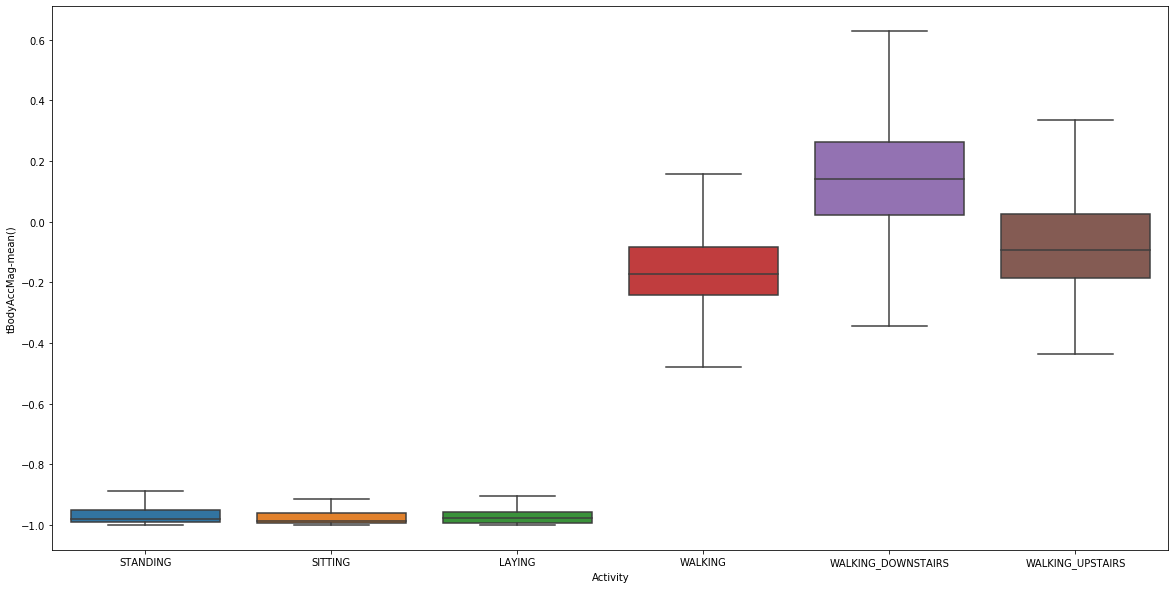

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()', data=df, showfliers = False)

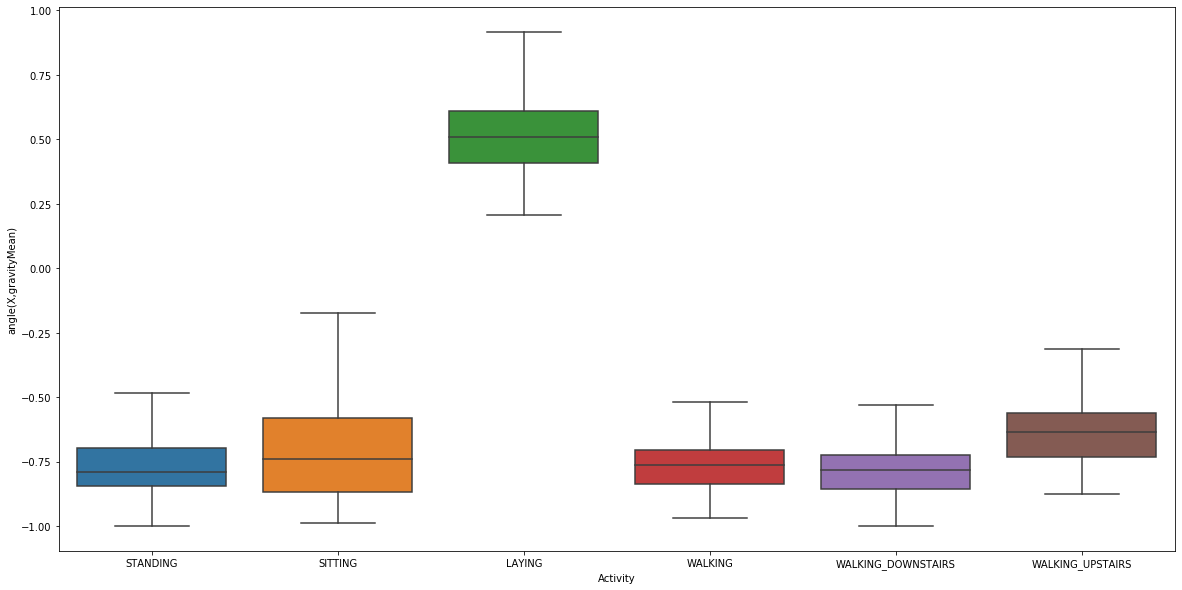

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=df, showfliers = False)

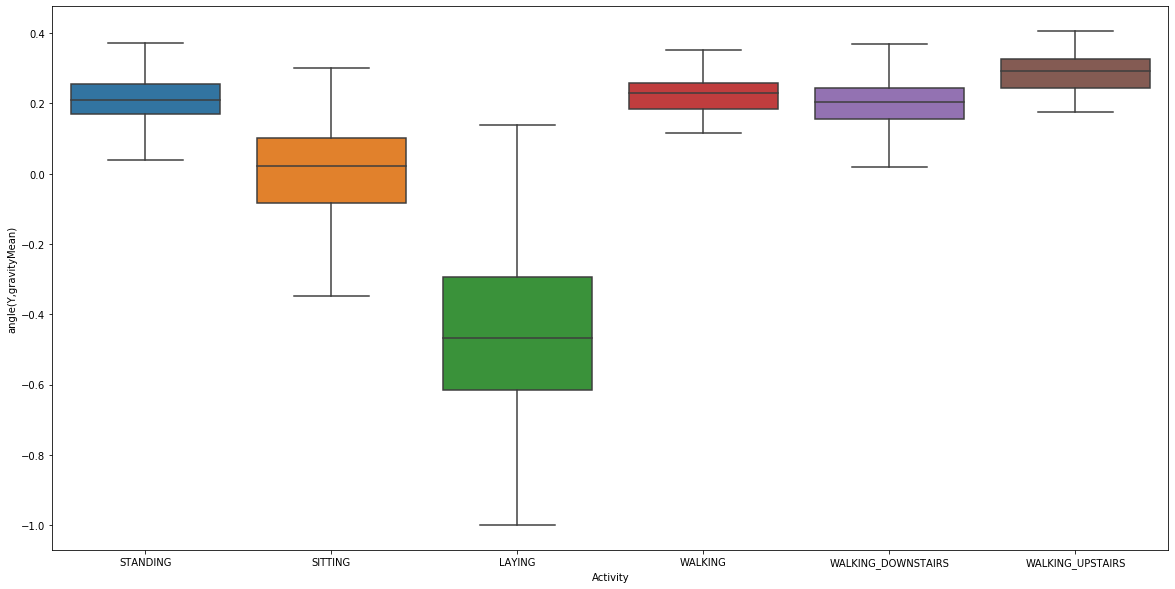

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data=df, showfliers = False)

In [0]:
X = df.drop(['subject', 'Activity'], axis = 1)
y = df.Activity

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.min()

-17.440432802691102

Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

[[-0.14067754 -0.151825    0.01074301 ...  0.87316477 -0.45662191
  -0.10079308]
 [-0.26919083 -0.05462373 -0.06544308 ... -0.26751939 -0.57144429
  -0.09428521]
 [ 0.27844422  0.16454218  0.00350739 ... -0.51702041  0.91533029
   0.12826139]
 [-0.01691715 -0.14347504  0.1350873  ... -0.13238054  0.02418576
   0.06763329]
 [ 0.14973931  0.20885451  0.1257947  ... -0.09488857 -0.14371817
  -0.08230101]
 [-0.001398   -0.02347291 -0.20968933 ...  0.13864413  0.23226832
   0.08148462]]
[ 0.06733237  0.00603346 -0.04826276  0.14806404 -0.11347196 -0.05969515]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[419,   0,   0,   0,   0,   0],
       [  0, 370,  15,   0,   0,   1],
       [  0,  11, 399,   0,   0,   0],
       [  0,   0,   0, 356,   0,   0],
       [  0,   0,   0,   0, 316,   0],
       [  0,   0,   0,   0,   1, 318]])

In [48]:
score = lr.score(X_test, y_test)
print(score)

0.9873073436083409


In [52]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9873073436083409


In [53]:
print(metrics.classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       419
           SITTING       0.97      0.96      0.96       386
          STANDING       0.96      0.97      0.97       410
           WALKING       1.00      1.00      1.00       356
WALKING_DOWNSTAIRS       1.00      1.00      1.00       316
  WALKING_UPSTAIRS       1.00      1.00      1.00       319

          accuracy                           0.99      2206
         macro avg       0.99      0.99      0.99      2206
      weighted avg       0.99      0.99      0.99      2206



Linear Kernel - SVM

In [0]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
# fit
model.fit(X_train, y_train)
# predict
y_pred = model.predict(X_test)

In [62]:
print("accuracy", metrics.accuracy_score(y_test, y_pred))
# precision
print(metrics.classification_report(y_test, y_pred))

accuracy 0.9832275611967362
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       419
           SITTING       0.96      0.95      0.96       386
          STANDING       0.96      0.96      0.96       410
           WALKING       1.00      1.00      1.00       356
WALKING_DOWNSTAIRS       0.99      1.00      1.00       316
  WALKING_UPSTAIRS       0.99      0.99      0.99       319

          accuracy                           0.98      2206
         macro avg       0.98      0.98      0.98      2206
      weighted avg       0.98      0.98      0.98      2206



In [63]:
print(confusion_matrix(y_test, y_pred))

[[419   0   0   0   0   0]
 [  0 368  17   0   0   1]
 [  0  16 394   0   0   0]
 [  0   0   0 356   0   0]
 [  0   0   0   0 315   1]
 [  0   0   0   0   2 317]]


Non Linear Kernel - SVM

In [64]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("accuracy", metrics.accuracy_score(y_test, y_pred))
# precision
print(metrics.classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy 0.9759746146872167
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       419
           SITTING       0.94      0.93      0.93       386
          STANDING       0.94      0.95      0.94       410
           WALKING       1.00      1.00      1.00       356
WALKING_DOWNSTAIRS       0.99      1.00      1.00       316
  WALKING_UPSTAIRS       1.00      1.00      1.00       319

          accuracy                           0.98      2206
         macro avg       0.98      0.98      0.98      2206
      weighted avg       0.98      0.98      0.98      2206

[[417   0   0   0   2   0]
 [  1 358  26   0   0   1]
 [  0  22 388   0   0   0]
 [  0   0   0 355   1   0]
 [  0   0   0   0 316   0]
 [  0   0   0   0   0 319]]


In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [77]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param = {'C': list(np.arange(0,1,0.1))[1:]}
svm_linear_grid = svm.SVC(kernel = "linear")
clf = GridSearchCV(svm_linear_grid, param_grid = param, scoring = "accuracy")
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8,
                               0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [78]:
print(clf.best_score_)
print(clf.best_params_)

0.9819272174889374
{'C': 0.1}


In [81]:
from sklearn import svm
svm_linear = svm.SVC(kernel = 'linear')
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.9832275611967362
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       419
           SITTING       0.96      0.95      0.96       386
          STANDING       0.96      0.96      0.96       410
           WALKING       1.00      1.00      1.00       356
WALKING_DOWNSTAIRS       0.99      1.00      1.00       316
  WALKING_UPSTAIRS       0.99      0.99      0.99       319

          accuracy                           0.98      2206
         macro avg       0.98      0.98      0.98      2206
      weighted avg       0.98      0.98      0.98      2206

[[419   0   0   0   0   0]
 [  0 368  17   0   0   1]
 [  0  16 394   0   0   0]
 [  0   0   0 356   0   0]
 [  0   0   0   0 315   1]
 [  0   0   0   0   2 317]]


In [80]:
from sklearn import svm
svm_linear = svm.SVC(kernel = 'linear', C = 0.1)
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.985947416137806
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       419
           SITTING       0.97      0.96      0.96       386
          STANDING       0.96      0.97      0.97       410
           WALKING       1.00      1.00      1.00       356
WALKING_DOWNSTAIRS       0.99      1.00      1.00       316
  WALKING_UPSTAIRS       0.99      0.99      0.99       319

          accuracy                           0.99      2206
         macro avg       0.99      0.99      0.99      2206
      weighted avg       0.99      0.99      0.99      2206

[[419   0   0   0   0   0]
 [  0 370  15   0   0   1]
 [  0  12 398   0   0   0]
 [  0   0   0 356   0   0]
 [  0   0   0   0 315   1]
 [  0   0   0   0   2 317]]


In [79]:
from sklearn import svm
svm_linear = svm.SVC(kernel = 'linear', C = 0.1, class_weight = 'balanced')
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.9868540344514959
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       419
           SITTING       0.97      0.96      0.97       386
          STANDING       0.97      0.97      0.97       410
           WALKING       1.00      1.00      1.00       356
WALKING_DOWNSTAIRS       0.99      1.00      1.00       316
  WALKING_UPSTAIRS       0.99      0.99      0.99       319

          accuracy                           0.99      2206
         macro avg       0.99      0.99      0.99      2206
      weighted avg       0.99      0.99      0.99      2206

[[419   0   0   0   0   0]
 [  0 372  13   0   0   1]
 [  0  12 398   0   0   0]
 [  0   0   0 356   0   0]
 [  0   0   0   0 315   1]
 [  0   0   0   0   2 317]]
